# On the Strokes Gained Statistics on the PGA Tour

Here we study and analyze the power of the four main strokes gained statistics on the PGA Tour: 
SG: Off-the-Tee, 
SG: Approach-the-Green, 
SG: Around-the-Green and 
SG: Putting. 
These four main stats are designed to measure a golfers relative skill in each of the corresponding aspects of the game. We will refer to these four strokes gained stats as the "strokes gained metrics".

Our goal is to somehow see how strong of predictors these measurements are in terms of the overall quality of the golfer. Of course there are many ways to measure "overall quality of a golfer", but for us we take it to mean their average Official World Golf Ranking points gained per event (This is the quantity on which the true Official World Golf Rankings are based). We will refer to this quantity as "average world golf ranking points".

We will ask: Given a golfer's yearly strokes gained metrics how well can we predict their average world golf ranking points?



This notebook is written with the purpose being to act as an excuse for myself to become more fluent in various aspects of data science including data cleaning, modelling and machine learning.


Our technique will be to first apply a simple linear regression model but then notice the inherent non-linear behavior of our problem and find more sucess fitting a higher degree polynomial.

The data used comes from the great dataset provided by Brad Klassen on Kaggle, covering many different player statistics over the years 2010-2018. Big thanks to Brad for doing the work in scraping all of the data.

# Data Preprocessing and Quick EDA

In [1]:
# Import libraries

import pandas as pd # For data manipulation
import numpy as np # For various mathematical computations, array manipulations
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [2]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

Load the data and take a quick look

In [3]:
df = pd.read_csv('PGA_Data_Historical.csv')
df.head(10)

,Player Name,Season,Statistic,Variable,Value
0,Robert Garrigus,2010,Driving Distance,Driving Distance - (ROUNDS),71
1,Bubba Watson,2010,Driving Distance,Driving Distance - (ROUNDS),77
2,Dustin Johnson,2010,Driving Distance,Driving Distance - (ROUNDS),83
3,Brett Wetterich,2010,Driving Distance,Driving Distance - (ROUNDS),54
4,J.B. Holmes,2010,Driving Distance,Driving Distance - (ROUNDS),100
5,John Daly,2010,Driving Distance,Driving Distance - (ROUNDS),63
6,Graham DeLaet,2010,Driving Distance,Driving Distance - (ROUNDS),88
7,Angel Cabrera,2010,Driving Distance,Driving Distance - (ROUNDS),64
8,Charles Warren,2010,Driving Distance,Driving Distance - (ROUNDS),64
9,D.J. Trahan,2010,Driving Distance,Driving Distance - (ROUNDS),92


Looking at the unique values in the "Statistic" column (of which there are many), we are only interested in 5 statistics corresponding to our 4 strokes gained metrics and average world golf ranking points. The exact format they appear in under the "Statistic" column is "SG: Off-the-Tee", 
"SG: Approach-the-Green", 
"SG: Around-the-Green",
"SG: Putting" and
"Official World Golf Ranking".

To see better what the structure of the dataset looks like, lets filter by "Tiger Woods" and "SG: Putting".

In [4]:
df[df['Player Name'] == 'Tiger Woods'][df['Statistic'] == 'SG: Putting']

,Player Name,Season,Statistic,Variable,Value
914352,Tiger Woods,2012,SG: Putting,SG: Putting - (ROUNDS),69
914543,Tiger Woods,2012,SG: Putting,SG: Putting - (AVERAGE),.339
914734,Tiger Woods,2012,SG: Putting,SG: Putting - (TOTAL SG:PUTTING),16.282
914925,Tiger Woods,2012,SG: Putting,SG: Putting - (MEASURED ROUNDS),48
1207633,Tiger Woods,2013,SG: Putting,SG: Putting - (ROUNDS),61
1207813,Tiger Woods,2013,SG: Putting,SG: Putting - (AVERAGE),.426
1207993,Tiger Woods,2013,SG: Putting,SG: Putting - (TOTAL SG:PUTTING),18.333
1208173,Tiger Woods,2013,SG: Putting,SG: Putting - (MEASURED ROUNDS),43
2714674,Tiger Woods,2018,SG: Putting,SG: Putting - (ROUNDS),68
2714867,Tiger Woods,2018,SG: Putting,SG: Putting - (AVERAGE),.266


Here we see that within each season, the "SG: Putting" stat has 4 variables. We are only interested in the " - (AVERAGE)" variable. 

The format for the other stokes gained metrics are similar.

Filtering by "Tiger Woods" and "Official World Golf Ranking" gives:

In [5]:
df[df['Player Name'] == 'Tiger Woods'][df['Statistic'] == 'Official World Golf Ranking']

,Player Name,Season,Statistic,Variable,Value
32016,Tiger Woods,2010,Official World Golf Ranking,Official World Golf Ranking - (EVENTS),40
33009,Tiger Woods,2010,Official World Golf Ranking,Official World Golf Ranking - (AVG POINTS),8.26
34002,Tiger Woods,2010,Official World Golf Ranking,Official World Golf Ranking - (TOTAL POINTS),330.36
34995,Tiger Woods,2010,Official World Golf Ranking,Official World Golf Ranking - (POINTS LOST),-396.35
35988,Tiger Woods,2010,Official World Golf Ranking,Official World Golf Ranking - (POINTS GAINED),140.02
36981,Tiger Woods,2010,Official World Golf Ranking,Official World Golf Ranking - (COUNTRY),USA
353908,Tiger Woods,2011,Official World Golf Ranking,Official World Golf Ranking - (EVENTS),40
354903,Tiger Woods,2011,Official World Golf Ranking,Official World Golf Ranking - (AVG POINTS),3.59
355898,Tiger Woods,2011,Official World Golf Ranking,Official World Golf Ranking - (TOTAL POINTS),143.68
356893,Tiger Woods,2011,Official World Golf Ranking,Official World Golf Ranking - (POINTS LOST),-277.79


(One thing to note is that there are more seasons worth of data for the Official World Golf Ranking stat compared to the strokes gained metrics. We will see that we drop the NaNs that appear because of this.)

Here we are only interested in the " - (AVG POINTS)" variable.

To subselect the relevant rows for us, we will first filter by the "Variable" column enforcing that the value is one of the elements of the list keep_vars

In [6]:
keep_vars = [
    'SG: Off-the-Tee - (AVERAGE)',
    'SG: Approach-the-Green - (AVERAGE)',
    'SG: Around-the-Green - (AVERAGE)',
    'SG: Putting - (AVERAGE)',
    'Official World Golf Ranking - (AVG POINTS)'
]

In [7]:
data = df[df['Variable'].apply(lambda x: x in keep_vars)] # Define our main dataframe to work with as data

In [8]:
data['Value'] = data['Value'].astype('float64') # All values are given as strings, change to float64

We use pd.pivot_table to reorganize the dataframe into one where linear regression is easier, along with some renaming of the columns.

In [9]:
data = pd.pivot_table(data=data, index=['Player Name', 'Season'], columns=['Statistic'], values='Value')

In [10]:
# Reorder and rename OWGR column

data['OWGR Avg Pts'] = data['Official World Golf Ranking'] # Put this column at the end
data = data.drop('Official World Golf Ranking', axis=1)

In [11]:
data.head(15)

Statistic              SG: Approach-the-Green  SG: Around-the-Green  \
Player Name    Season                                                 
Aaron Baddeley 2010                    -0.797                 0.391   
               2011                     0.196                 0.438   
               2012                    -0.504                 0.152   
               2013                    -0.669                 0.293   
               2014                    -0.291                 0.051   
               2015                    -0.719                 0.370   
               2016                    -0.382                 0.398   
               2017                     0.256                 0.310   
               2018                     0.117                 0.595   
Aaron Goldberg 2010                       NaN                   NaN   
               2011                       NaN                   NaN   
               2012                       NaN                   NaN   
               2013                       NaN                   NaN   
               2014                       NaN                   NaN   
Aaron Pike     2015                       NaN                   NaN   

Statistic              SG: Off-the-Tee  SG: Putting  OWGR Avg Pts  
Player Name    Season                                              
Aaron Baddeley 2010              0.112        0.502          0.68  
               2011              0.190        0.324          2.79  
               2012             -0.108        0.604          1.80  
               2013             -0.603        0.661          0.95  
               2014             -0.589        0.872          0.93  
               2015             -0.596        0.722          0.43  
               2016             -0.363        0.581          1.14  
               2017             -0.782        0.044          1.04  
               2018             -0.345       -0.057          0.65  
Aaron Goldberg 2010                NaN          NaN          0.49  
               2011                NaN          NaN          0.50  
               2012                NaN          NaN          0.34  
               2013                NaN          NaN          0.13  
               2014                NaN          NaN          0.16  
Aaron Pike     2015                NaN          NaN          0.10

There are many rows for which the strokes gained metrics are not available, for now will will simply drop them.

In [12]:
data = data.dropna() # Drop NaN's

We will not preprocess the data any further as the relative size of all of the features and target values are approximately the same.

Before applying linear regression, let's take a look at a pairplot of all the features.

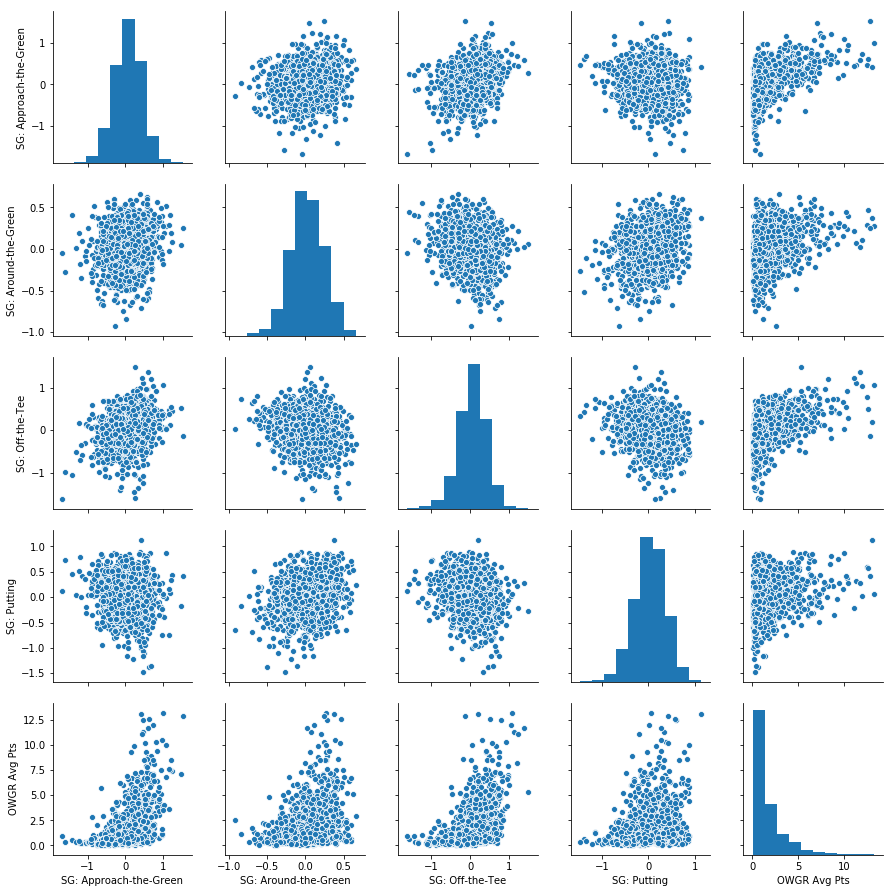

In [13]:
sns.pairplot(data=data)
plt.show()

Visually there does not seem to be any relationship among the 4 strokes gained stats. However, "OWGR Avg Pts" as a function of the other stats seems like there is some relationship we can exploit. Furthermore, it (visually) seems like this relationship is non-linear, so fitting a higher degree polynomial for our model might prove useful.

Nonetheless, we start with standard linear regresssion.

# Linear Regression (Fitting a Linear Model)

In [14]:
# Import linear regression libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split features and target

X = data.iloc[: ,:-1]
y = data.iloc[:,-1:]

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12)


In [15]:
# Fit the model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate the Model: 
Looking at the r^2 score on both the train and test sets we get

In [16]:
print('training set r^2 score = ' + str(lr.score(X_train, y_train)))

print('testing set r^2 score = ' + str(lr.score(X_test, y_test)))

training set r^2 score = 0.5536473204786732
testing set r^2 score = 0.5106268671550285


The pair of r^2 scores are relatively close which is a good sign, but the values themeselves are not that great.

We can visualize how our predictions differed from what they should be

In [17]:
# Create list of predictions

lin_reg_preds = pd.DataFrame(lr.predict(X), columns=['OWGR Avg Pts - Prediction'], index=y.index)

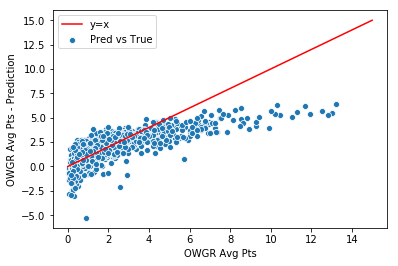

In [18]:
# Plot and compare with the line y=x

sns.scatterplot(data=pd.concat([y,lin_reg_preds], axis=1), x='OWGR Avg Pts', y='OWGR Avg Pts - Prediction', label='Pred vs True') # scatter plot of prediction vs true
sns.lineplot(np.linspace(0,15,20),np.linspace(0,15,20), color='r', label='y=x') # plot the line y=x
plt.show()

We see that on top of the r^2 score not being great, we seem to have the problem of consistantly underestimating better golfers and also predicting some values to be negative.

Let us try and improve the model by adding some non-linearity.

# Linear Regression (Fitting a Higher Degree Polynomial)

In [19]:
# Import polynomial libraries

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features

degree = 2 # Start with 2
poly = PolynomialFeatures(degree, include_bias=False)

X_poly = poly.fit_transform(X) # No longer a pandas dataframe
y_poly = y # Still a pandas dataframe

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_poly, random_state=12)

In [20]:
# Fit the model

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_poly_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate the Model:

In [21]:
print('training set r^2 score = ' + str(lr_poly.score(X_poly_train, y_poly_train)))

print('testing set r^2 score = ' + str(lr_poly.score(X_poly_test, y_poly_test)))

training set r^2 score = 0.7412861942132898
testing set r^2 score = 0.7069699689370771


We see that we get a significant improvement compared to standard linear regression.

Plotting and comparing to the line y=x as above:

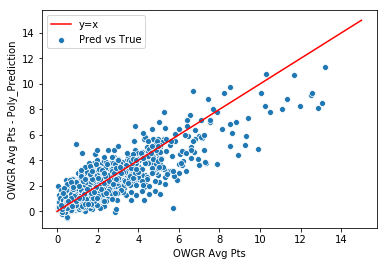

In [22]:
# Create list of predictions
lin_poly_reg_preds = pd.DataFrame(lr_poly.predict(X_poly), columns=['OWGR Avg Pts - Poly_Prediction'], index=y.index) 

# Plot and compare with the line y=x
sns.scatterplot(data=pd.concat([y_poly,lin_poly_reg_preds], axis=1), x='OWGR Avg Pts', y='OWGR Avg Pts - Poly_Prediction', label='Pred vs True') # scatter plot of prediction vs true
sns.lineplot(np.linspace(0,15,20),np.linspace(0,15,20), color='r', label='y=x') # plot the line y=x
plt.show()

After playing around with the degree, it doesn't look like we can do much better than this.

## Conclusion:

Although, it is obvious that the better a golfers strokes gained statistics, the higher they will be in the Official World Golf Rankings, it is interesting to see just how much the model improves by adding some non-linearity.

## Problems:

There are some obvious problems with this, most notably coming from the official definition of "OWGR Avg Pts". The official number is computed for a given golfer over a rolling period of two years, as the average total OWGR points earned over all of their events in that 2 year period. However, if a golfer has played fewer than 40 events the divisor in the average is still taken to be 40. So, it would be better to consider feature vectors that include the previous two years of strokes gained metrics (possibly weighted).